In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from ppo import PPOAGENT
from DQN import DQNAGENT
from sac import SACAgent
from td3 import TD3Agent

# Continuous Action Space

### Experiment 1: Pendulum-v1

In [76]:
env = gym.make("Pendulum-v1")
num_episodes = 100
training_time = 480  # 480 seconds = 8 minutes

In [77]:
sac = SACAgent(
    env=env,
)
sac_rewards = sac.learn(num_episodes=num_episodes)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [03:58<00:00,  2.39s/it]


In [78]:
td3 = TD3Agent(
    env=env,
)
td3_rewards = td3.learn(num_episodes=num_episodes)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:15<00:00,  1.36s/it]


In [79]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(num_episodes=num_episodes)

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:06<00:00,  5.49it/s]


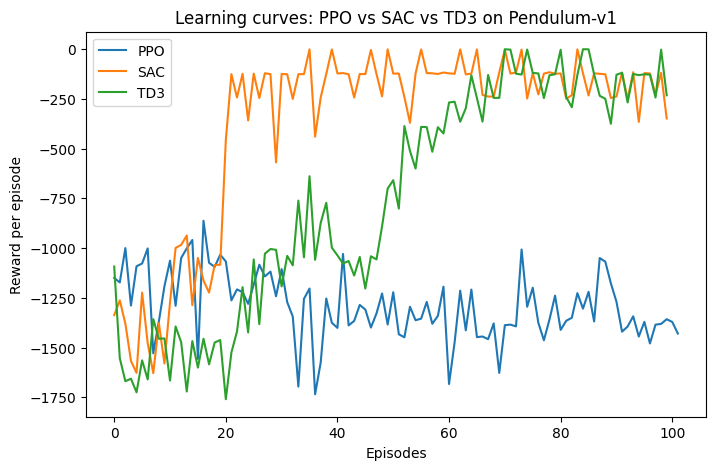

In [80]:
plt.figure(figsize=(8,5))
plt.plot(ppo_rewards, label="PPO")
plt.plot(sac_rewards, label="SAC")
plt.plot(td3_rewards,  label="TD3")
plt.xlabel("Episodes")
plt.ylabel("Reward per episode")
plt.legend()
plt.title("Learning curves: PPO vs SAC vs TD3 on Pendulum-v1")
plt.show()

In [ ]:
sac = SACAgent(
    env=env,
)
sac_rewards = sac.learn(max_training_time=training_time)

  2%|▏         | 193/10000 [08:01<6:47:28,  2.49s/it]


In [90]:
td3 = TD3Agent(
    env=env,
)
td3_rewards = td3.learn(max_training_time=training_time)

  0%|          | 37/100000 [53:23<2403:48:27, 86.57s/it]


In [88]:
ppo = PPOAGENT(
    env=env,
)
ppo_rewards = ppo.learn(max_training_time=training_time)

  9%|▊         | 866/10000 [08:00<1:24:26,  1.80it/s]


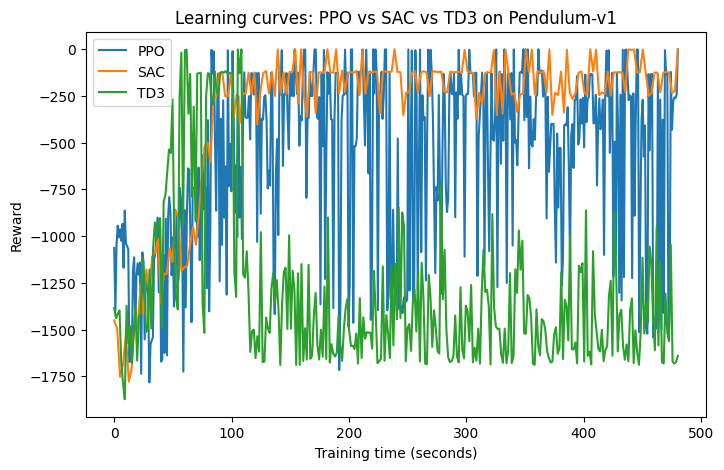

In [89]:
def plot_learning_curve(rewards, label):
    if len(rewards) > training_time:
        rewards = rewards[::len(rewards)//training_time]
        
    t_rewards = np.linspace(0, training_time, len(rewards))
    plt.plot(t_rewards, rewards, label=label)
    
plt.figure(figsize=(8,5))
plot_learning_curve(ppo_rewards, label="PPO")
plot_learning_curve(sac_rewards, label="SAC")
plot_learning_curve(td3_rewards, label="TD3")
plt.xlabel("Training time (seconds)")
plt.ylabel("Reward")
plt.legend()
plt.title("Learning curves: PPO vs SAC vs TD3 on Pendulum-v1")
plt.show()